# ############################################################
# GO TO THE END OF THE PAGE, 
# FOR THE ***AUGMENTATION CODE***
# ############################################################

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# IMAGE THRESHOLDING

In [48]:
class thresholding:
    def __init__(self):
        self.img = cv2.imread("OpenCV_Ineuron\opencv\img\old.jpg",0)
    
    def binaryThreshold(self):
        ret,self.th1 = cv2.threshold(self.img,127,255,cv2.THRESH_BINARY)
    
    def inverseBinaryThreshold(self):
        ret,self.th2 = cv2.threshold(self.img,127,255,cv2.THRESH_BINARY_INV)
    
    def adaptiveThreshold(self):
        self.img = cv2.medianBlur(self.img,5)
        self.th3 = cv2.adaptiveThreshold(self.img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
        self.th4 = cv2.adaptiveThreshold(self.img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    
    def otsuThreshold(self):
        ret,self.th5 = cv2.threshold(self.img,127,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    
    def guassianOtsuThreshold(self):
        blur = cv2.GaussianBlur(self.img,(3,3),0)
        ret,self.th6 = cv2.threshold(blur,127,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    
    def disp(self):
        titles = ['OriginalImage','BinaryThreshold',"Inverse_Binary_Threshold",'Adaptive_Mean_Threshold','Adaptive_GAUSSIAN_THRESHOLD','OTSU_THRESHOLD','GAUSSIAN_OSU_THRESHOLD']
        images = [self.img,self.th1,self.th2,self.th3,self.th4,self.th5,self.th6]
        for i in range(6):
            plt.imshow(images[i],cmap='gray')
            plt.title(titles[i])
            plt.xticks([])
            plt.yticks([])
            plt.show()

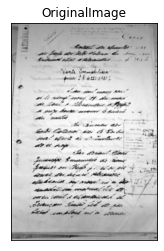

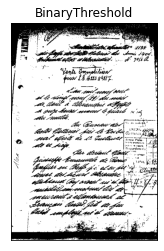

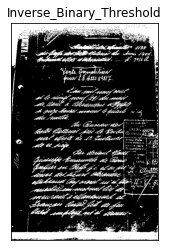

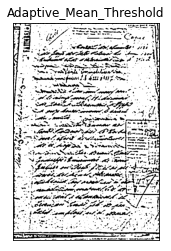

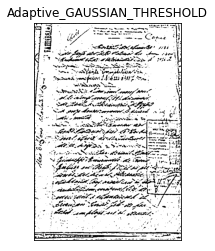

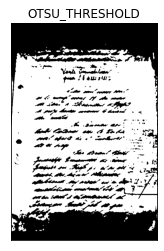

In [49]:
th = thresholding()
th.binaryThreshold()
th.inverseBinaryThreshold()
th.adaptiveThreshold()
th.otsuThreshold()
th.guassianOtsuThreshold()
th.disp()

# TRANSFORMATIONS

In [89]:
class transformations:
    def __init__(self):
        self.img = cv2.imread("OpenCV_Ineuron/opencv/img/actress.jpg",1)
    
    def scaling(self):
        ### Different interpolation methods are used. 

        ### Preferable interpolation methods are *cv2.INTER_AREA* for shrinking and *cv2.INTER_CUBIC* (slow) & *cv2.INTER_LINEAR* for zooming. 

        ###By default, interpolation method used is *cv2.INTER_LINEAR* for all resizing purposes.
        self.scaled_img = cv2.resize(self.img,None,fx=5,fy=5,interpolation=cv2.INTER_CUBIC)
    
    def translation(self):
        ### Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (*tx,ty*), you can create the transformation matrix **M**
        rows,cols = self.img.shape[:2]
        M = np.float32([[1,0,100],[0,1,100]])
        self.translated_img = cv2.warpAffine(self.img,M,(cols,rows))
        
    def rotation(self):
        ### getRotationMatrix2D(center,angle,zoom)
        ### Divide by two to rototate the image around its centre
        height, width = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),90,0.5)
        self.rotated_image = cv2.warpAffine(self.img,rotation_matrix,(width,height))
    
    def horizontalFlip(self):
        self.hflipped = cv2.flip(self.img,1)
    
    def verticalFlip(self):
        self.vflipped = cv2.flip(self.img,0)
    
    def affineTransformation(self):
        rows,cols,ch = self.img.shape
        points_a = np.float32([[320,15], [700,215], [85,610]])
        points_b = np.float32([[0,0], [420,550], [0,594]])
        M = cv2.getAffineTransform(points_a,points_b)
        self.warpedAffine = cv2.warpAffine(self.img,M,(cols,rows)) 
        
    def perspectiveTransformation(self):
        rows,cols = self.img.shape[:2]
        points_a = np.float32([[320,15], [700,215], [85,610], [530,780]])
        points_b = np.float32([[0,0], [420,0], [0,594], [420,594]])
        M = cv2.getPerspectiveTransform(points_a,points_b)
        self.warpPerspective = cv2.warpPerspective(self.img,M,(420,594))
    
    def disp(self):
        titles = ['Original Image','scaled Image','Translated Image','Rotated Image','Horizontal Flipped Image','VerticalFlipped Image','affineTransformation','perspectiveTransformation']
        images = [self.img,self.scaled_img,self.translated_img,self.rotated_image,self.hflipped,self.vflipped,self.warpedAffine,self.warpPerspective]
        
        for i in range(8):
            plt.imshow(images[i])
            plt.title(titles[i])
            plt.show()

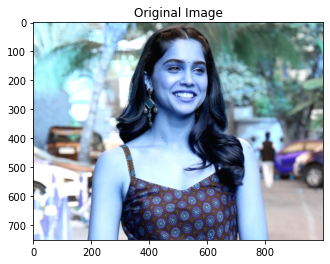

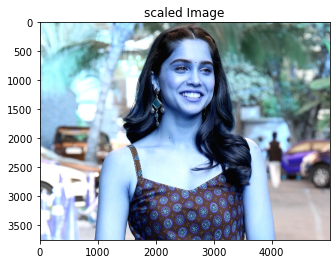

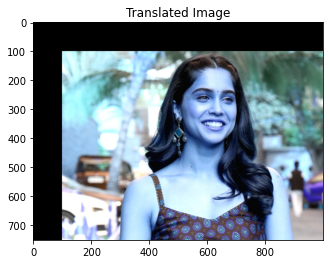

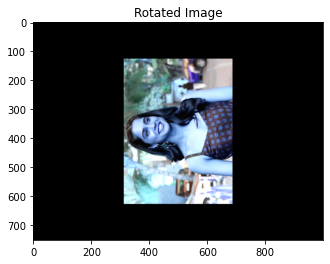

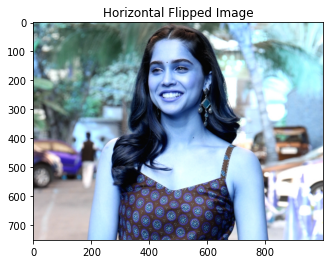

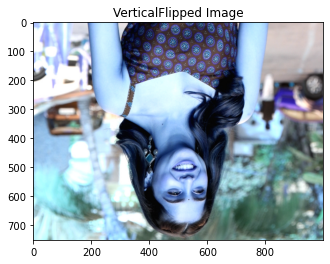

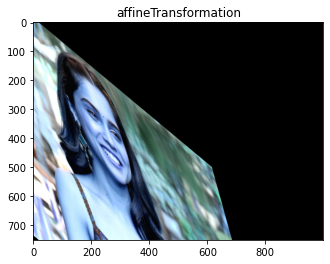

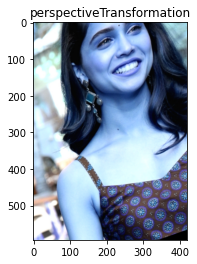

In [90]:
trans = transformations()
trans.scaling()
trans.translation()
trans.rotation()
trans.horizontalFlip()
trans.verticalFlip()
trans.affineTransformation()
trans.perspectiveTransformation()
trans.disp()

# IMAGE SMOOTHING

In [98]:
class smoothing:
    def __init__(self):
        self.img = cv2.imread("OpenCV_Ineuron/opencv/img/actress.jpg",1)
    
    def gaussianFiltering(self):
         self.gblur = cv2.GaussianBlur(self.img,(11,11),0)
    
    def medianFiltering(self):
        self.mblur = cv2.medianBlur(self.img,51)
    
    def disp(self):
        titles = ['gblur','mblur']
        images = [self.gblur,self.mblur]
        for i in range(2):
            plt.imshow(images[i])
            plt.title(titles[i])
            plt.show()

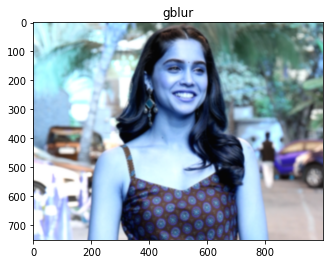

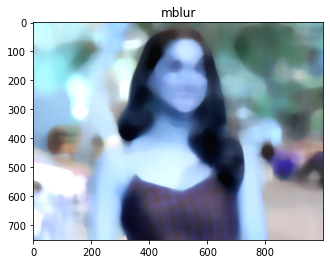

In [99]:
sm = smoothing()
sm.gaussianFiltering()
sm.medianFiltering()
sm.disp()

# Morphological Transformations

In [120]:
class morphologicalTransformations:
    def __init__(self):
        self.img = cv2.imread("OpenCV_Ineuron/opencv/img/op.png",1)
    
    def Erosion(self):
        kernel = np.ones((5,5),np.uint8)
        self.erode = cv2.erode(self.img,kernel,iterations=1)
        
    def Dilation(self):
        kernel = np.ones((5,5),np.uint8)
        self.dilate = cv2.dilate(self.img,kernel,iterations=1)
        
    def Opening(self):
        kernel = np.ones((5,5),np.uint8)
        self.open = cv2.morphologyEx(self.img, cv2.MORPH_OPEN, kernel)

    def Closing(self):
        kernel = np.ones((5,5),np.uint8)
        self.close = cv2.morphologyEx(self.img, cv2.MORPH_CLOSE, kernel)
    
    def disp(self):
        titles = ['Erosion','Dilation','Opening','Closing']
        images = [self.erode,self.dilate,self.open,self.close]
        for i in range(4):
            plt.imshow(images[i])
            plt.title(titles[i])
            plt.show()
        

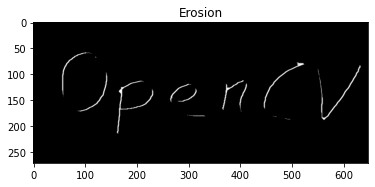

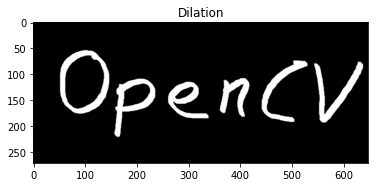

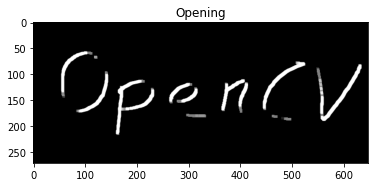

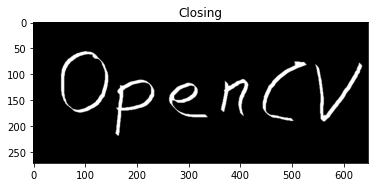

In [121]:
mt = morphologicalTransformations()
mt.Erosion()
mt.Dilation()
mt.Opening()
mt.Closing()
mt.disp()

# CONTOURS

```
 Three arguments in cv2.findContours() function, 
 * first one is source image, 
 * second is contour retrieval mode, 
 * third is contour approximation method. 
 
It outputs the image, contours and hierarchy. 

contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
```

In [146]:
import numpy as np
import cv2
def contours(path):
    im = cv2.imread(path)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    cv2.imshow('Canny Edges After Contouring', thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [147]:
contours(path='OpenCV_Ineuron/opencv/img/actress.jpg')

In [159]:
import numpy as np
import cv2
def draw_contours(path):
    im = cv2.imread(path)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    print("Number of Contours found = " + str(len(contours)))
    img = cv2.drawContours(im, contours, -1, (0,255,0), 3)
    cv2.drawContours(im, contours, -1, (0,255,0), 3)
    cv2.imshow('Contours', im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [214]:
draw_contours('OpenCV_Ineuron/opencv/img/actress.jpg')

Number of Contours found = 826


# AUGMENTATION AND SAVING THE DATA.

In [178]:
import os

## Transformation

In [212]:
class Augmentation:
    def __init__(self,mkdirpath,imgpath,rgb_or_gray):
        self.mkdpath = mkdirpath
        self.imgpath = imgpath
        self.rgb_or_gray = rgb_or_gray
        self.img = cv2.imread(self.imgpath,self.rgb_or_gray)
        os.makedirs(self.mkdpath,exist_ok=True)
    def transformation(self):
        self.scaled_img = cv2.resize(self.img,None,fx=5,fy=5,interpolation=cv2.INTER_CUBIC)
        
        rows,cols = self.img.shape[:2]
        M = np.float32([[1,0,100],[0,1,100]])
        self.translated_img = cv2.warpAffine(self.img,M,(cols,rows))
        
        height, width = self.img.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),90,0.5)
        self.rotated_image = cv2.warpAffine(self.img,rotation_matrix,(width,height))
        
        self.hflipped = cv2.flip(self.img,1)
        self.vflipped = cv2.flip(self.img,0)
        
        rows,cols,ch = self.img.shape
        points_a = np.float32([[320,15], [700,215], [85,610]])
        points_b = np.float32([[0,0], [420,550], [0,594]])
        M = cv2.getAffineTransform(points_a,points_b)
        self.warpedAffine = cv2.warpAffine(self.img,M,(cols,rows))
        
        rows,cols = self.img.shape[:2]
        points_a = np.float32([[320,15], [700,215], [85,610], [530,780]])
        points_b = np.float32([[0,0], [420,0], [0,594], [420,594]])
        M = cv2.getPerspectiveTransform(points_a,points_b)
        self.warpPerspective = cv2.warpPerspective(self.img,M,(420,594))
    
    def savedata(self):
        images = [self.scaled_img,self.translated_img,self.rotated_image,self.hflipped,self.vflipped,self.warpedAffine,self.warpPerspective]
        for i in range(7):
            cv2.imwrite(self.mkdpath+f"/image{i}.jpg",images[i])

In [213]:
aug = Augmentation(mkdirpath = "E://FULL STACK DATA SCIENCE/INEURON/11. OpenCV/augmented",imgpath = "OpenCV_Ineuron/opencv/img/actress.jpg",rgb_or_gray = 1)
aug.transformation()
aug.savedata()

## Morphological Transformation

In [218]:
class Augmentation_Morphological_Transforamtion:
    def __init__(self,mkdirpath,imgpath,rgb_or_gray):
        self.mkdpath = mkdirpath
        self.imgpath = imgpath
        self.rgb_or_gray = rgb_or_gray
        self.img = cv2.imread(self.imgpath,self.rgb_or_gray)
        os.makedirs(self.mkdpath,exist_ok=True)
    
    def morphological_transformation(self):
        self.img = cv2.imread("OpenCV_Ineuron/opencv/img/op.png",1)

        kernel = np.ones((5,5),np.uint8)
        self.erode = cv2.erode(self.img,kernel,iterations=1)

        kernel = np.ones((5,5),np.uint8)
        self.dilate = cv2.dilate(self.img,kernel,iterations=1)
        
        kernel = np.ones((5,5),np.uint8)
        self.open = cv2.morphologyEx(self.img, cv2.MORPH_OPEN, kernel)
        
        kernel = np.ones((5,5),np.uint8)
        self.close = cv2.morphologyEx(self.img, cv2.MORPH_CLOSE, kernel)
    
    def savedata(self):
        images = [self.erode,self.dilate,self.open,self.close]
        for i in range(4):
            cv2.imwrite(self.mkdpath+f"/image{i}.jpg",images[i])

In [219]:
aug = Augmentation_Morphological_Transforamtion(mkdirpath = "E://FULL STACK DATA SCIENCE/INEURON/11. OpenCV/augmented_morphological",imgpath="OpenCV_Ineuron/opencv/img/op.png",rgb_or_gray=0)
aug.morphological_transformation()
aug.savedata()

In [224]:
class contours:
    def __init__(self,mkdirpath,imgpath,rgb_or_gray):
        self.mkdpath = mkdirpath
        self.imgpath = imgpath
        self.rgb_or_gray = rgb_or_gray
        self.img = cv2.imread(self.imgpath,self.rgb_or_gray)
        os.makedirs(self.mkdpath,exist_ok=True)
    def find_contours(self):
        im = cv2.imread(self.imgpath)
        imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        ret,self.thresh = cv2.threshold(imgray,127,255,0)
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
    def draw_contours(self):
        self.im = cv2.imread(self.imgpath)
        imgray = cv2.cvtColor(self.im,cv2.COLOR_BGR2GRAY)
        ret,self.thresh = cv2.threshold(imgray,127,255,0)
        contours, hierarchy = cv2.findContours(self.thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        print("Number of Contours found = " + str(len(contours)))
        img = cv2.drawContours(self.im, contours, -1, (0,255,0), 3)
        cv2.drawContours(self.im, contours, -1, (0,255,0), 3)
        
    def savedata(self):
        images = [self.thresh,self.im]
        for i in range(2):
            cv2.imwrite(self.mkdpath+f"/image{i}.jpg",images[i])

In [225]:
c = contours(mkdirpath="E://FULL STACK DATA SCIENCE/INEURON/11. OpenCV/augmented_contours",imgpath = "OpenCV_Ineuron/opencv/img/actress.jpg",rgb_or_gray = 1)
c.find_contours()
c.draw_contours()
c.savedata()

Number of Contours found = 826
